# Análisis de resultados Smina

Importa las librerías necesarias

In [20]:
import pandas as pd
import matplotlib as plt

Carga los resultados del scrining. Asumiendo que tu archivo lleva por nombe `vs_results.csv`

In [21]:
# Carga de los resultados de vina
dk_res = pd.read_csv('./vs_results.csv')
dk_res.head()

,ligando,score
0,CS1,-7.3
1,CS100,-9.1
2,CS102,-9.9
3,CS154,-8.8
4,CS16,-8.2


Carga el archivo con las etiquetas de actividad de las moléculas:
- 1 = molécula activa para CDK2 (*true binder*)
- 0 = molécula señuelo para CDK2 (*inactive/decoy*)

In [22]:
# Carga de las actividades reales de los ligandos
df_act = pd.read_csv('./cdk2_activity_mols.csv')

Utiliza el comando `merge` de *[pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)* para unir la tabla de resultados con la de etiquetas de actividad. El parámetro `inner` permite conservar sólo las filas con valores en común en ambas tablas.

In [23]:
# Unión de ambas tablas
df = dk_res.merge(df_act, how='inner')
df.head()

,ligando,score,actividad
0,CS1,-7.3,1
1,CS100,-9.1,0
2,CS102,-9.9,0
3,CS154,-8.8,0
4,CS16,-8.2,1


## Visualización de los resultados

In [24]:
%run plot_metrics.py

### Ranking de moléculas

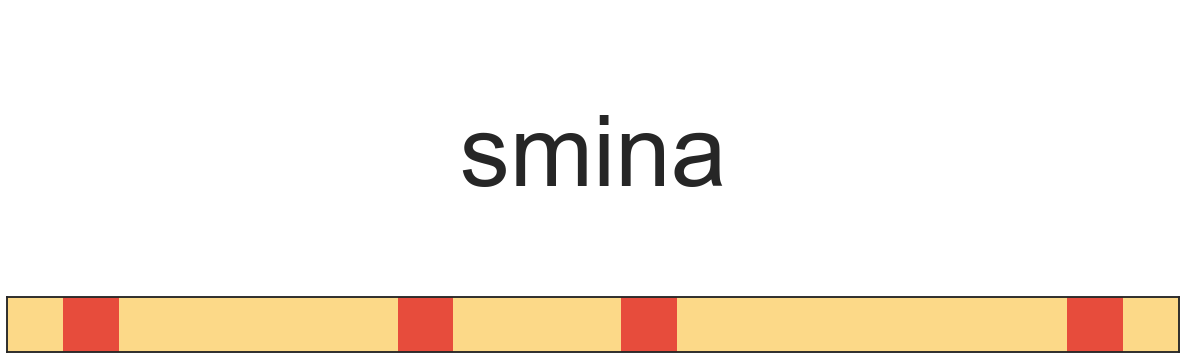

In [28]:
vs_res = PlotMetric(y_true = df.actividad, 
                    y_pred_dict = {'smina': df.score})
vs_res.plot_actives_distribution(add_to_title='')

### Curva ROC y Área bajo la curva ROC

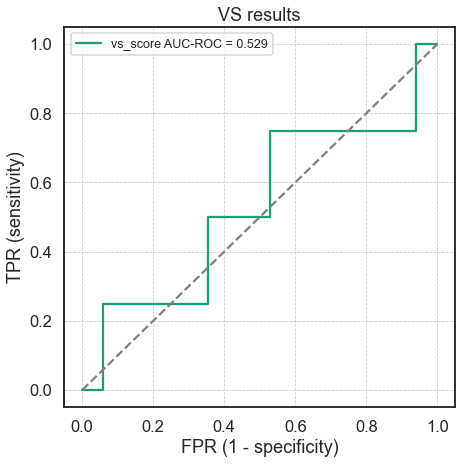

In [26]:
vs_res.plot_roc_auc(title='VS results',
                    fontsize='x-small', 
                    show_by_itself = False)

### Distribución de los scores entre Activos e Inactivos

Normalidad Activos (ShapiroWilks)


'> W = 0.96 , p-value=0.81'

Normalidad Inactivos (ShapiroWilks)


'> W = 0.98 , p-value=0.9818'

Prueba de Bartlett para Homocedasticidad


'> W = 0.08 , p-value=0.7758'

t-student para pruebas independientes


'> t = -0.04 , p-value=0.9691'

Mann-Whitney (no paramétrica)


'> W = 32.0 , p-value=0.4464'

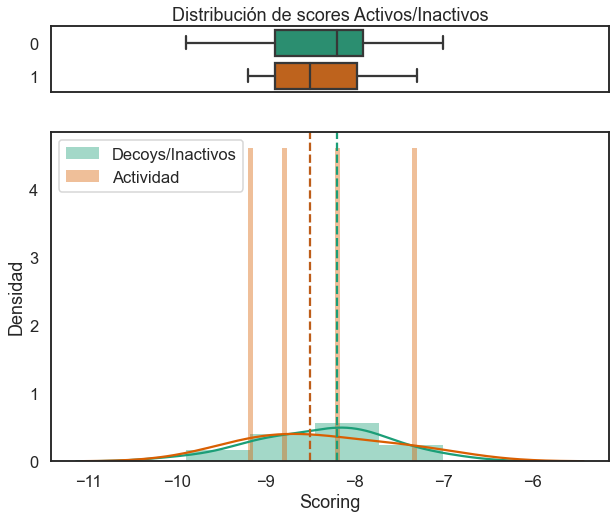

In [27]:
compare_two_distributions(df)